# **Анализ результатов А/В теста, Принятие решений в бизнесе**

**Цель проекта**: изучить запросы руководства и подготовить рекомендации для принятия решения об изменении модели ведения бизнеса. \
**Задачи проекта**: приоритизировать несколько различных гипотез, провести A/B-тестирование.

Часть 1. Приоритизация гипотез. \
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
**Задача** \
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. \
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. \
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Данные для первой части \
Файл /datasets/hypothesis.csv. \
Hypothesis — краткое описание гипотезы; \
Reach — охват пользователей по 10-балльной шкале; \
Impact — влияние на пользователей по 10-балльной шкале; \
Confidence — уверенность в гипотезе по 10-балльной шкале; \
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы. \
Данные для второй части \
Файл /datasets/orders.csv. Скачать датасет \
transactionId — идентификатор заказа; \
visitorId — идентификатор пользователя, совершившего заказ; \
date — дата, когда был совершён заказ; \
revenue — выручка заказа; \
group — группа A/B-теста, в которую попал заказ. \
Файл /datasets/visitors.csv. \
date — дата; \
group — группа A/B-теста; \
visitors — количество пользователей в указанную дату в указанной группе A/B-теста \

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [ ]:
pd.options.display.max_colwidth = 150
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence']/ hypothesis['Efforts']
display(round(hypothesis.sort_values(by = 'ICE', ascending = False),2))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [ ]:
hypothesis['RICE'] = hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach'] / hypothesis['Efforts']
print(hypothesis.sort_values(by = 'RICE', ascending = False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Во фреймворке ICE не учитываются такие показатели, как количество пользователей, которых коснется изменение и стоимость тестирования. По этой причине данный фрейймворк можно использовать только если стоимость и количество пользователей не являются ключевыми.

**В первом фреймворке лидирующими гипотезами были:**
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**Во втором:**
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

# Анализ А/В-теста

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
 1. Остановить тест, зафиксировать победу одной из групп.
 2. Остановить тест, зафиксировать отсутствие различий между группами.
 3. Продолжить тест.

Перед началом теста посмотрим количество групп в тесте и посмотрим на их размеры.

In [ ]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В тесте участвовало всего 2 группы, A/B-тест парный. Далее нужно узнать размер каждой группы.

In [ ]:
orders.groupby(by = 'group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

В группе B гораздо больше пользователей, чем в группе А. Тест выйдет несбалансированным. Но это не окажет заметного влияния на итоговые результаты, так как мы оцениваем как раз количество пользователей и средний чек, который является относительной величиной.

Узнаем даты начала и окончания теста.

In [ ]:
print(visitors['date'].min(), visitors['date'].max())

2019-08-01 2019-08-31


Тест проводился весь август. Далее проверим, есть ли пользователи, которые попали в обе группы теста.

In [ ]:
grouped_orders = orders.groupby(by = 'visitorId', as_index = False)['group'].nunique()
grouped_orders.columns = ['visitorId', 'groups']
both_groups = grouped_orders.loc[grouped_orders['groups']>1]
print(both_groups)

       visitorId  groups
2        8300375       2
44     199603092       2
51     232979603       2
55     237748145       2
66     276558944       2
84     351125977       2
97     393266494       2
114    457167155       2
119    471551937       2
122    477780734       2
192    818047933       2
236    963407295       2
299   1230306981       2
311   1294878855       2
316   1316129916       2
318   1333886533       2
340   1404934699       2
386   1602967004       2
393   1614305549       2
402   1648269707       2
406   1668030113       2
422   1738359350       2
436   1801183820       2
469   1959144690       2
487   2038680547       2
491   2044997962       2
569   2378935119       2
591   2458001652       2
614   2579882178       2
619   2587333274       2
622   2600415354       2
639   2654030115       2
648   2686716486       2
661   2712142231       2
662   2716752286       2
677   2780786433       2
710   2927087541       2
715   2949041841       2
718   2954449915       2


Достаточно большое количество пользователей попало в обе группы. Данных пользователей следует удалить, так как они могут влиять на итоговые результаты теста.

Так как много пользователей попали в обе группы, то мы не можем доверять таблице с количеством посетителей. Требуется создать свою, где не будет дубликатов. В первую очередь очистим нашу таблицу от лишних пользователей.

In [ ]:
orders = orders.loc[~orders['visitorId'].isin(both_groups['visitorId'])]

После очистки таблицы нужно взглянуть на наличие пропусков и дубликатов, а также провести преобразование данных

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1016 non-null   int64 
 1   visitorId      1016 non-null   int64 
 2   date           1016 non-null   object
 3   revenue        1016 non-null   int64 
 4   group          1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропуски отсутствуют, проверим наличие дубликатов по id пользователей и дате.

In [ ]:
orders.duplicated(subset = ['transactionId']).sum()

0

In [ ]:
visitors.duplicated(subset = ['date', 'group']).sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors.duplicated().sum()

0

Дубликатов нет. Далее преобразуем дату в нужный формат.

In [ ]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [ ]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

В итоге получились 2 новые таблицы, с которыми далее можно работать.

## Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

In [ ]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

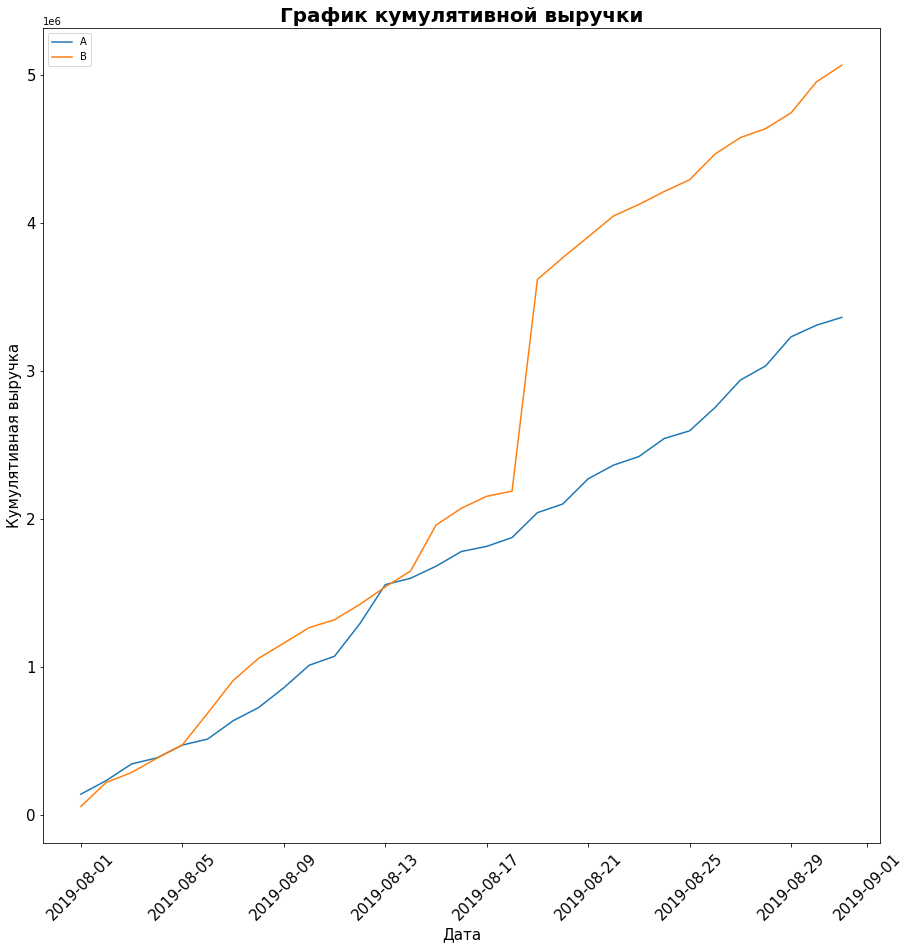

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
plt.xlabel('Дата', fontsize= 15)
plt.ylabel('Кумулятивная выручка', fontsize= 15)
plt.title('График кумулятивной выручки', fontsize=20, fontweight='bold')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.legend();

Судя по полученному графику, у группы Б произошел резкий рост 17 августа. Возможно, в данных есть аномалии, которые стоит удалить для более корректного отображения результатов теста. Тем не менее, группа Б с самого начала теста была лучше группы А. Вероятно, что и далее ее результаты будут лучше, чем у группы А, несмотря на закравшуюся аномалию.

## Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

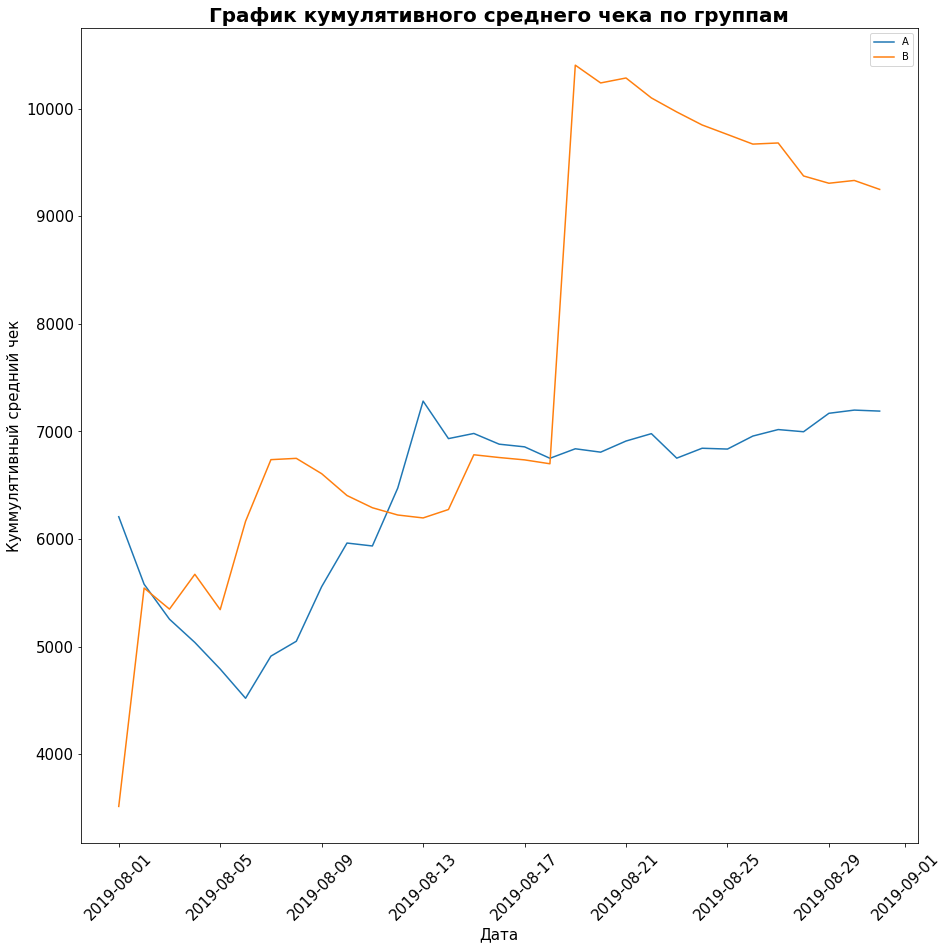

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
plt.xlabel('Дата', fontsize= 15)
plt.ylabel('Куммулятивный средний чек', fontsize= 15)
plt.title('График кумулятивного среднего чека по группам', fontsize=20, fontweight='bold')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B');
plt.legend();

Средний чек группы А ежедневно колеблется, но с 13 августа зафиксировался в районе 7-8 тысяч. Средний чек группы Б имел меньшие колебания в начале эксперимента, затем резко вырос 17 числа и начал падение.

## Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

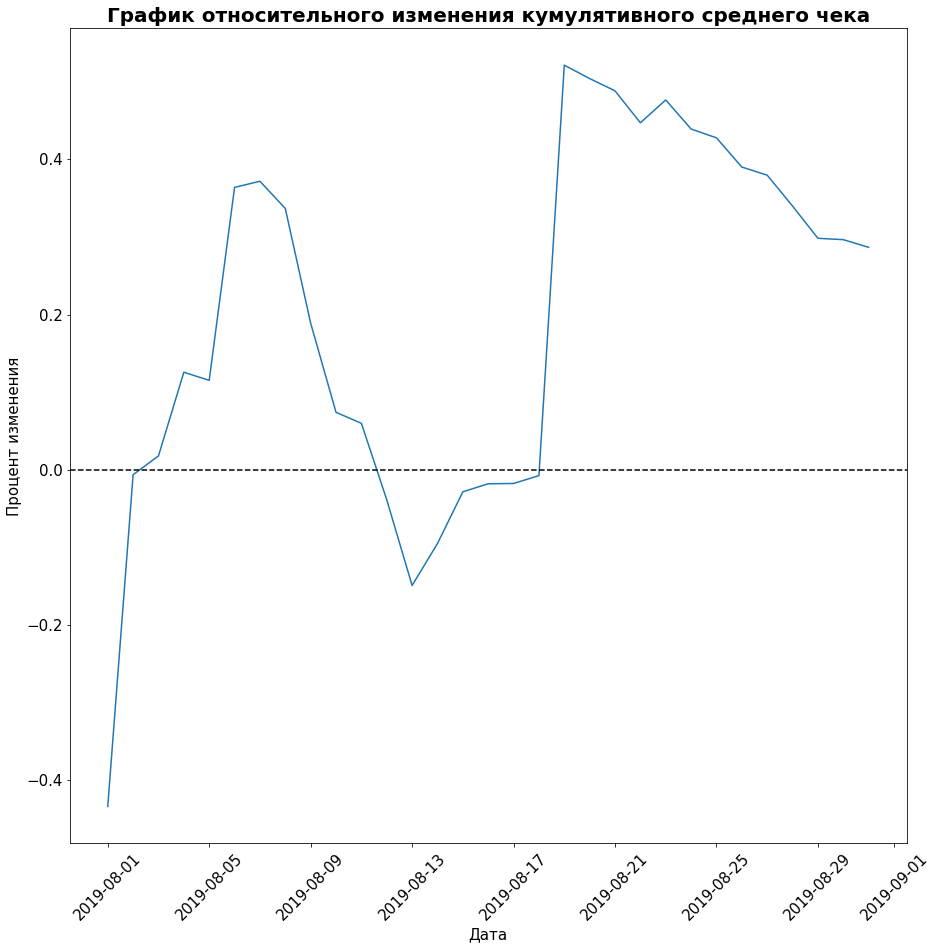

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
plt.xlabel('Дата', fontsize= 15)
plt.title('График относительного изменения кумулятивного среднего чека', fontsize=20, fontweight='bold')
plt.ylabel('Процент изменения', fontsize= 15)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График показывает, что группа Б стабильно лучше группы А за исключениемм нескольких дней.

## Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

In [ ]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


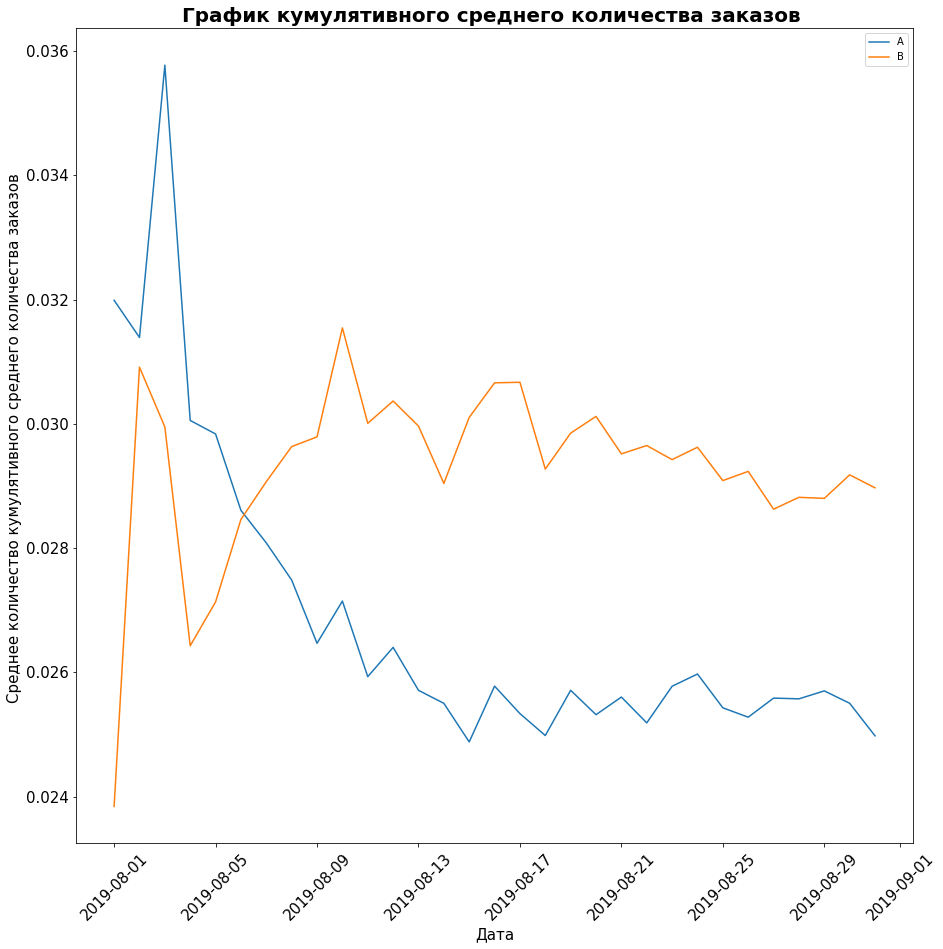

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
plt.xlabel('Дата', fontsize= 15)
plt.ylabel('Среднее количество кумулятивного среднего количества заказов ', fontsize= 15)
plt.title('График кумулятивного среднего количества заказов ', fontsize=20, fontweight='bold')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

Среднее количество заказов на посетителя группы Б выше группы А, однако имеет тенденцию к снижению. Среднее количество обеих групп стабилизировалось уже через неделю.

## Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

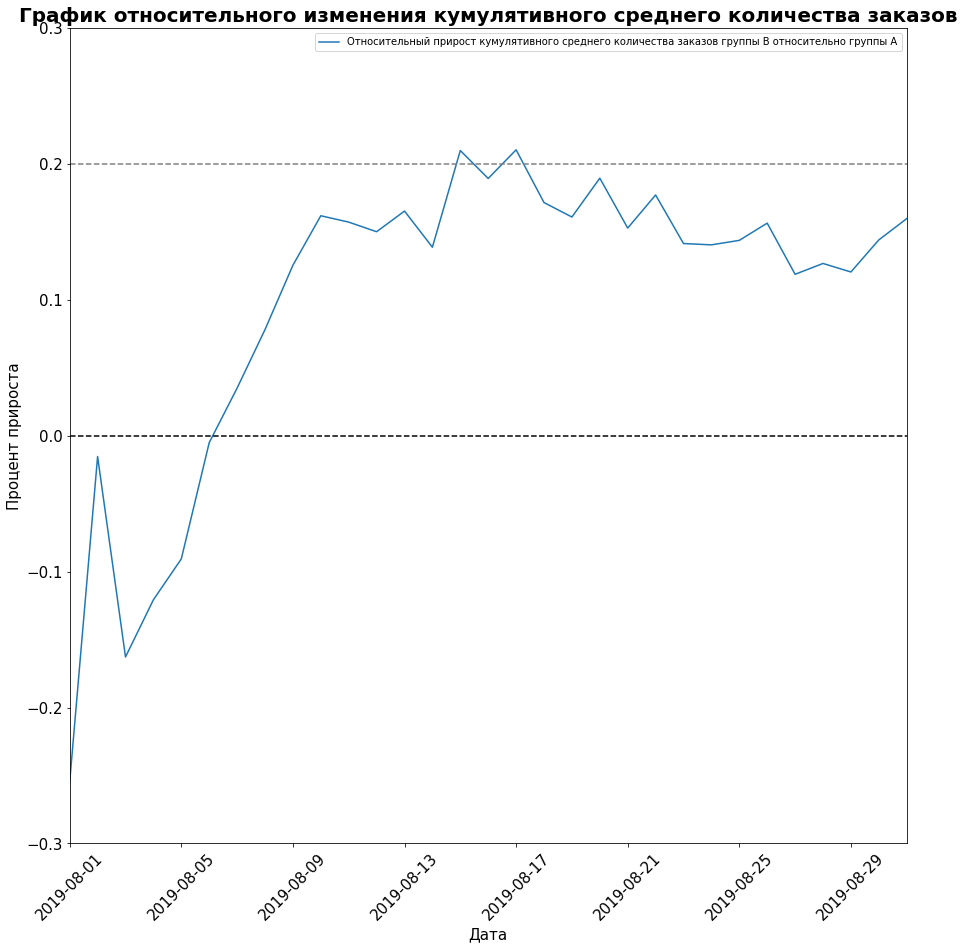

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
plt.xlabel('Дата', fontsize= 15)
plt.ylabel('Процент прироста', fontsize= 15)
plt.title('График относительного изменения кумулятивного среднего количества заказов', fontsize=20, fontweight='bold')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3]);

Группа А стабильно отстает от группы В

## Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

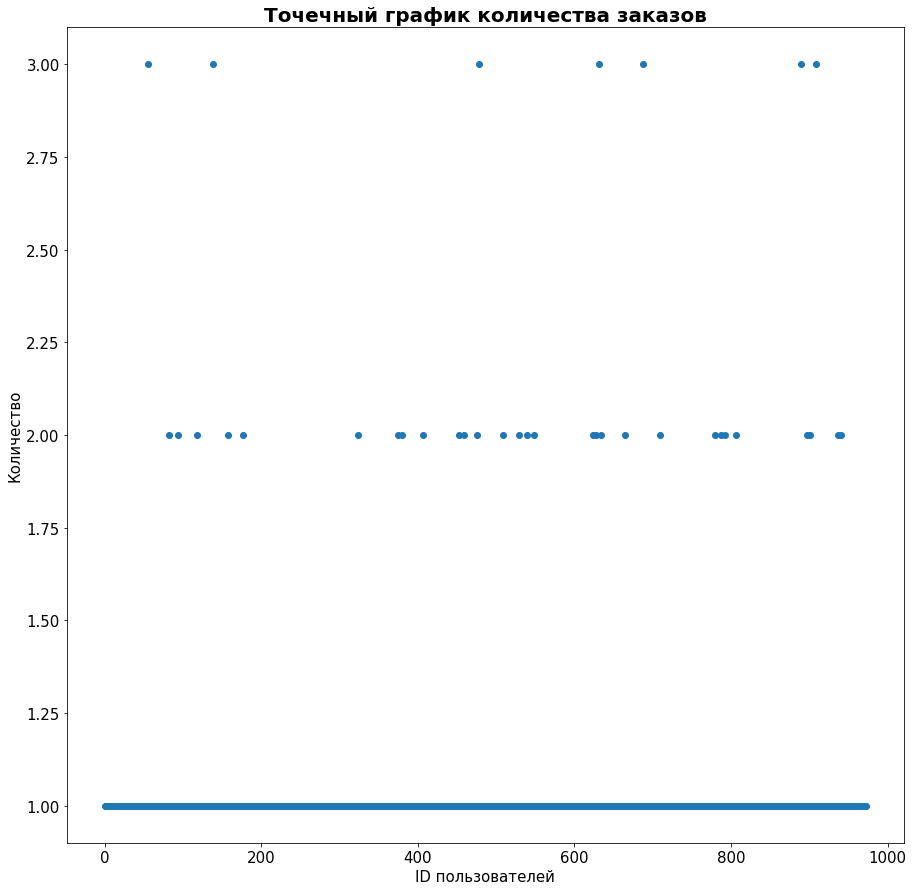

In [ ]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,15))
plt.tick_params(labelsize=15)
plt.xlabel('ID пользователей', fontsize= 15)
plt.ylabel('Количество', fontsize= 15)
plt.title('Точечный график количества заказов', fontsize=20, fontweight='bold')
plt.scatter(x_values, ordersByUsers['orders']);

Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

## Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.

In [ ]:
percentile = np.percentile(ordersByUsers['orders'], [90,95,99]) # Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(percentile)

[1. 1. 2.]


Менее 1%  пользователей совершило более 2 заказов. Следует убрать пользователей, заказавших более двух раз чтобы они не искажали данные теста.

 ## Построить точечный график стоимостей заказов. Сделать выводы и предположения.

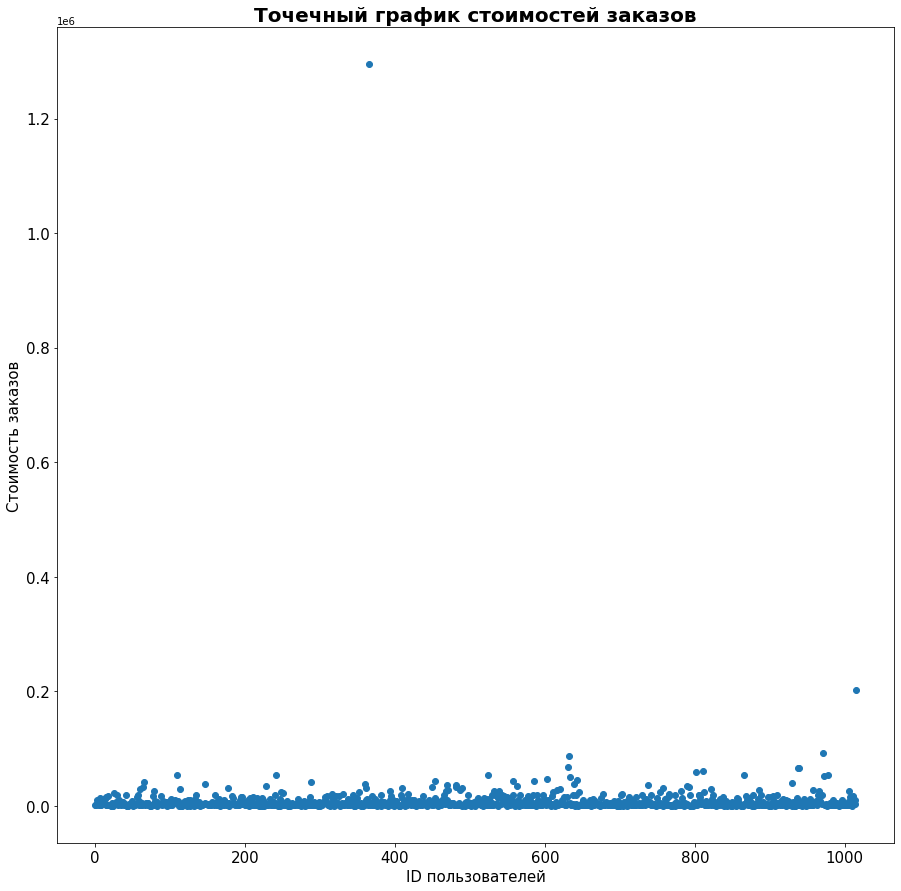

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,15))
plt.tick_params(labelsize=15)
plt.xlabel('ID пользователей', fontsize= 15)
plt.ylabel('Стоимость заказов', fontsize= 15)
plt.title('Точечный график стоимостей заказов', fontsize=20, fontweight='bold')
plt.scatter(x_values, orders['revenue']);

Заказов стоимостью более 200 000 рублей очень мало. Это аномалии, которые нужно удалить.

## Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.

In [ ]:
percentile = np.percentile(orders['revenue'], [90,95,99]) # Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(percentile)

[17990. 26785. 53904.]


Менее 1% людей сделали заказ более, чем на 58 тысяч и менее 5% более, чем на 28 тысяч. Следует убрать пользователей, заказавших более, чем на 28 тысяч чтобы они не искажали данные теста.

## Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы.
Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: различия в среднем количестве заказов на посетителя между группами есть. Статистическая значимость составит 5%. Данный уровень статистической значимости позволит отсеять значения, которые представляют собой случайности. Критерий проверки гипотез - тест Уилконсона-Манна-Уитни.

In [ ]:
print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительная разница:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
относительная разница: 0.160


P-value значительно меньше 0.05, поэтому есть основания отвергнуть нулевую гипотезу. Анализ «сырых данных» сообщает, что в среднем количестве заказов на посетителя между группами присутствуют статистически значимые различия. Относительный прирост среднего группы B к среднему группы A равен 16%.

## Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Однако относительное различие среднего чека между сегментами целых 29%. Напомним, что на данный момент используются сырые данные, поэтому выбросы могут значительно искажать результаты. Все это говорит о том, что генеральная совокупность не репрезентативна и нужно ее очистить от аномалий.

## Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительная разница:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.00702
относительная разница: 0.189


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. В данном случае анализ сообщает, что в среднем количестве заказов на посетителя между группами притсутствуют статистически значимые различия. Относительный прирост среднего группы B к среднему группы A равен 19%.

## Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [ ]:
print('p-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительная разница:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.788
относительная разница: -0.032


Статистическая значимость почти не изменилась. Это значит, что выбросы были немногочисленные и очень крупные и влияли не на выборку в целом, а на среднее значение. Разница между выборками составила всего 3%, сделав выборку Б по среднему чеку даже хуже выборки А.

Проверим, сколько значений пришлось убрать из общего количества строк, чтобы понимать, стоит ли доверять тесту.

In [ ]:
print('Удаленных пользователей', usersWithManyOrders.nunique()+usersWithExpensiveOrders.nunique())
print('Процент удаленных пользователей', str(round(((usersWithManyOrders.nunique()+usersWithExpensiveOrders.nunique())/orders['visitorId'].nunique())*100, 2))+'%')

Удаленных пользователей 16
Процент удаленных пользователей 1.64%


## Итоги тестирования.

По результатам теста можно присудить относительную победу группе Б. Несмотря на то, что у этой группы средний чек на посетителя практически равен среднему чеку группы А, в группе Б посетители совершают больше заказов почти на 20%. Это способствует и увеличению выручки на 20%. Соответственно, бизнесу стоит учесть изменения, произведенные для группы Б в дальнейшей работе для увеличения выручки.